In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_info.csv to lending_club_info.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [ ]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [ ]:
def feat_info(row_name):
  print(data_info.loc[row_name]['Description'])

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [ ]:
df = pd.read_csv('lending_club_loan_two.csv')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df['loan_amnt'].head()

0    10000.0
1     8000.0
2    15600.0
3     7200.0
4    24375.0
Name: loan_amnt, dtype: float64

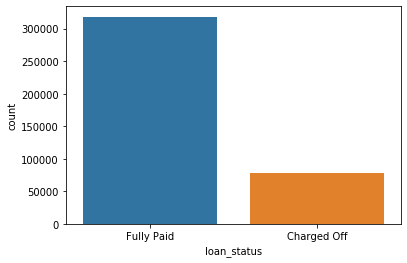

In [ ]:
sns.countplot(x='loan_status',data=df) #accuracy is a terrible metric for model effectiveness, as even a model that guesses fully paid everytime will have a high accuracy
#use maybe precision and recall.

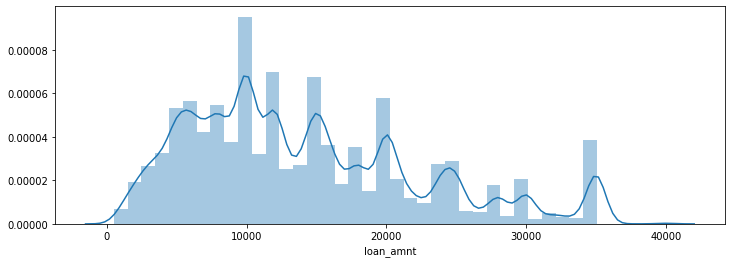

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],bins=40)

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

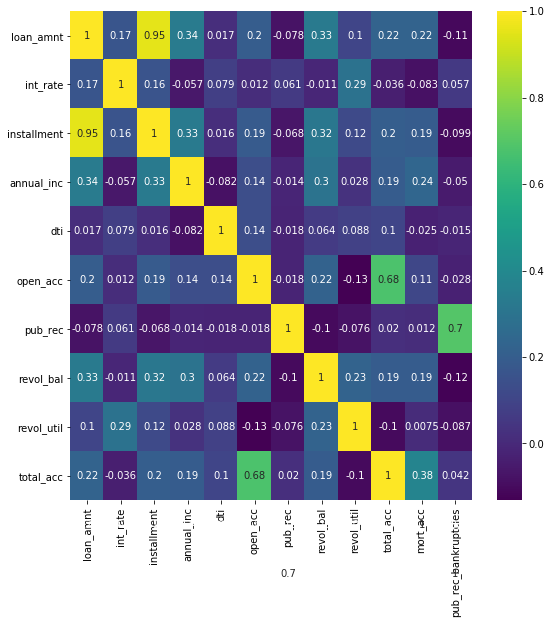

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,cmap='viridis')#annotations will be there
#doesnt acc stretch heatmap
plt.ylim(10,0)

In [ ]:
#interesting,from our corr heatmap, we see near perfect corr between installment and loan_pay status

In [ ]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


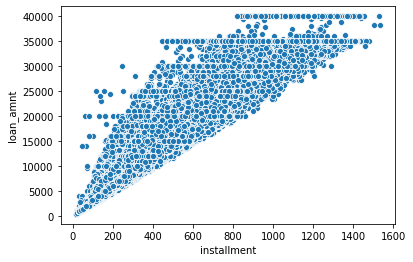

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

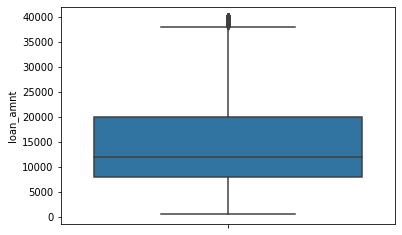

In [ ]:
sns.boxplot(y='loan_amnt',data=df)

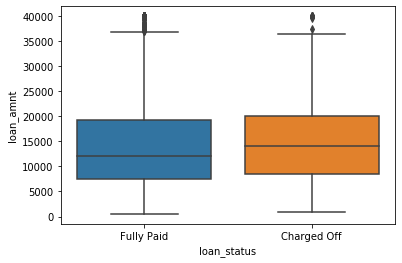

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df.groupby('loan_status').describe()

loan_amnt                                     ... pub_rec_bankruptcies               
                count          mean          std     min  ...                  25%  50%  75%  max
loan_status                                               ...                                    
Charged Off   77673.0  15126.300967  8505.090557  1000.0  ...                  0.0  0.0  0.0  8.0
Fully Paid   318357.0  13866.878771  8302.319699   500.0  ...                  0.0  0.0  0.0  8.0

[2 rows x 96 columns]

In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
feat_info('grade')

LC assigned loan grade


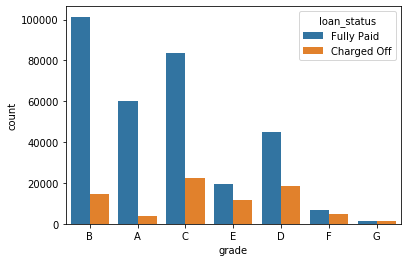

In [ ]:
sns.countplot(x='grade',data=df,hue='loan_status')

In [ ]:
# % of charged off loans inc with grade

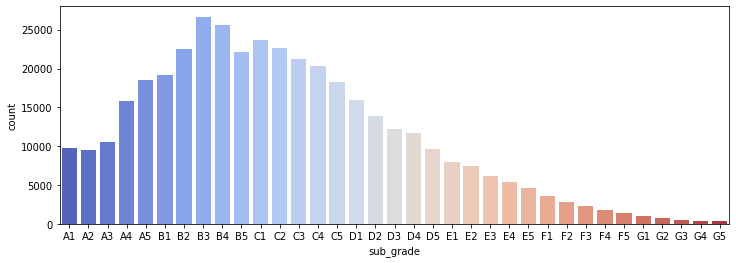

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,palette = 'coolwarm',order=subgrade_order)

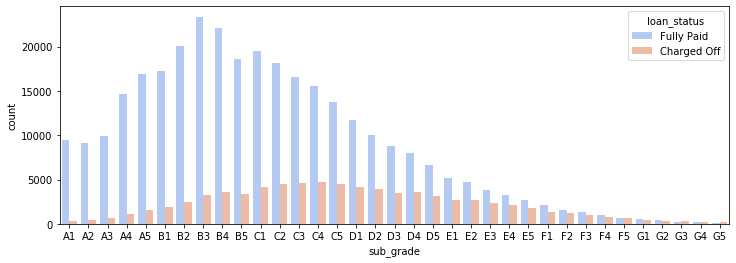

In [ ]:
#f ang g paid back rate almost equal, often less, than charged off rate.
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,palette = 'coolwarm',order=subgrade_order,
              hue = 'loan_status')

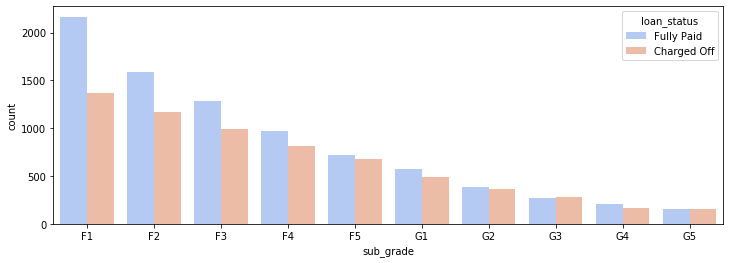

In [ ]:
f_and_g = df[ (df['grade'] == 'G') | (df['grade'] == 'F') ]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,palette = 'coolwarm',order=subgrade_order,
              hue = 'loan_status')

In [ ]:
df['loan_repaid'] = df['loan_status'].map( {'Fully Paid':1, 'Charged Off':0} )

df[['loan_repaid','loan_status']] #remember, for two coll at once, double brackets

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


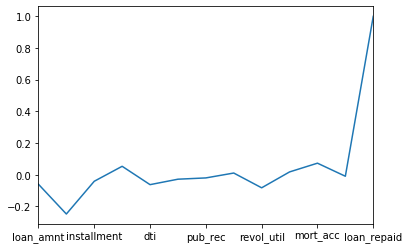

In [ ]:
df.corr()['loan_repaid'].plot()

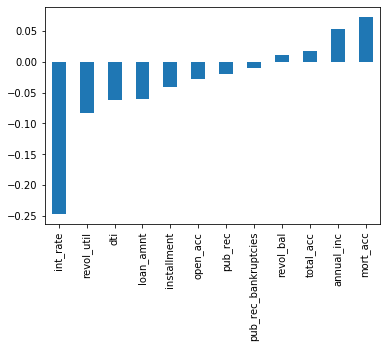

In [ ]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

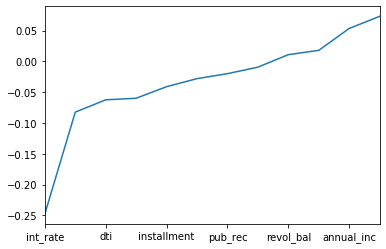

In [ ]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot()

In [ ]:
 df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
print(100.0*(df.isnull().sum())/len(df)) #what percent of dataframe is null (category)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


In [ ]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [ ]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [ ]:
len(df['emp_title'].unique())

173106

In [ ]:
df['emp_title'].value_counts() #dummy variables for all these kinda impractical.

Teacher                4389
Manager                4250
Registered Nurse       1856
RN                     1846
Supervisor             1830
                       ... 
Hotpads                   1
INTERPARK                 1
Huge llc                  1
Pharmacist/Oncology       1
Kato Engineering          1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
df = df.drop('emp_title',axis=1)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [ ]:
sorted(df['emp_length'].dropna().unique()

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
emp_length_order= [ '< 1 year'
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

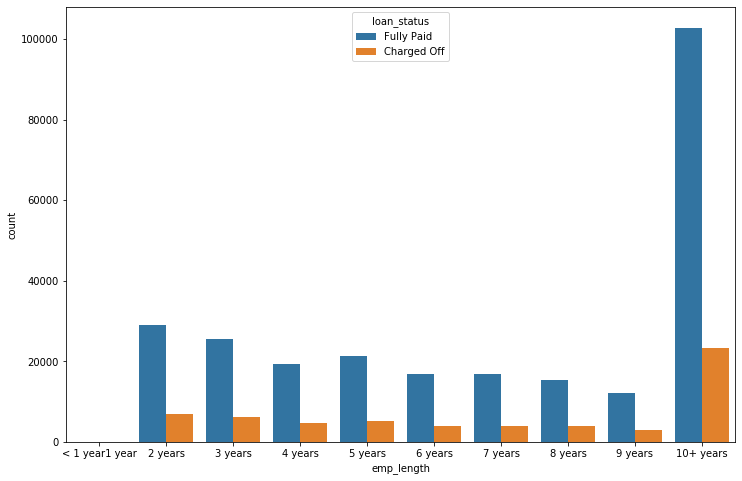

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue="loan_status")

In [ ]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()


In [ ]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()

In [ ]:
emp_co/emp_fp

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,,,,,,
1 year,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.248649,0.249041,0.248649,0.248649,0.248649,0.248649,0.248649,0.248552,0.248649,0.248649,0.248649,0.261061,0.248766,0.248649,0.248649
10+ years,0.225770,0.225770,0.225770,0.225770,0.225770,0.225770,0.225770,0.225770,0.225770,0.225770,0.225770,0.225770,0.225837,0.225770,0.225770,0.225770,0.225770,0.225770,0.225756,0.225770,0.225770,0.225770,0.229115,0.225765,0.225770,0.225770
2 years,0.239560,0.239560,0.239560,0.239560,0.239560,0.239560,0.239560,0.239560,0.239560,0.239560,0.239560,0.239560,0.239733,0.239560,0.239560,0.239560,0.239560,0.239560,0.239493,0.239560,0.239560,0.239560,0.251745,0.239739,0.239560,0.239560
3 years,0.242593,0.242593,0.242593,0.242593,0.242593,0.242593,0.242593,0.242593,0.242593,0.242593,0.242593,0.242593,0.242260,0.242593,0.242593,0.242593,0.242593,0.242593,0.242618,0.242593,0.242593,0.242593,0.254725,0.242914,0.242593,0.242593
4 years,0.238213,0.238213,0.238213,0.238213,0.238213,0.238213,0.238213,0.238213,0.238213,0.238213,0.238213,0.238213,0.237937,0.238213,0.238213,0.238213,0.238213,0.238213,0.238090,0.238213,0.238213,0.238213,0.250514,0.237979,0.238213,0.238213
5 years,0.237911,0.237911,0.237911,0.237911,0.237911,0.237911,0.237911,0.237911,0.237911,0.237911,0.237911,0.237911,0.237946,0.237911,0.237911,0.237911,0.237911,0.237911,0.237857,0.237911,0.237911,0.237911,0.249639,0.238062,0.237911,0.237911
6 years,0.233341,0.233341,0.233341,0.233341,0.233341,0.233341,0.233341,0.233341,0.233341,0.233341,0.233341,0.233341,0.233197,0.233341,0.233341,0.233341,0.233341,0.233341,0.233475,0.233341,0.233341,0.233341,0.242568,0.233440,0.233341,0.233341
7 years,0.241887,0.241887,0.241887,0.241887,0.241887,0.241887,0.241887,0.241887,0.241887,0.241887,0.241887,0.241887,0.241955,0.241887,0.241887,0.241887,0.241887,0.241887,0.241954,0.241887,0.241887,0.241887,0.246663,0.241896,0.241887,0.241887
8 years,0.249625,0.249625,0.249625,0.249625,0.249625,0.249625,0.249625,0.249625,0.249625,0.249625,0.249625,0.249625,0.250033,0.249625,0.249625,0.249625,0.249625,0.249625,0.249429,0.249625,0.249625,0.249625,0.255197,0.249690,0.249625,0.249625


In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [ ]:
feat_info('title')

The loan title provided by the borrower


In [ ]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [ ]:
df = df.drop('title',axis=1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df['mort_acc'].value_counts() 
#the majority dont have any mortagage accounts


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df['mort_acc'].value_counts() / df['mort_acc'].value_counts().sum() 
#40% of ppl have none.

0.0     0.390182
1.0     0.168649
2.0     0.139428
3.0     0.106212
4.0     0.077846
5.0     0.050788
6.0     0.030899
7.0     0.016894
8.0     0.008712
9.0     0.004623
10.0    0.002415
11.0    0.001337
12.0    0.000737
13.0    0.000408
14.0    0.000299
15.0    0.000170
16.0    0.000103
17.0    0.000061
18.0    0.000050
19.0    0.000042
20.0    0.000036
24.0    0.000028
22.0    0.000020
21.0    0.000011
25.0    0.000011
27.0    0.000008
23.0    0.000006
32.0    0.000006
26.0    0.000006
31.0    0.000006
30.0    0.000003
28.0    0.000003
34.0    0.000003
Name: mort_acc, dtype: float64

In [ ]:
df['mort_acc'].isnull().sum()

37795

In [ ]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
#total_acc correlates pretty well with mort_acc

In [ ]:
df['total_acc'].isnull().sum() #and has no missing data

0

In [ ]:
df.groupby('total_acc').mean()
#groipbying without mean wouldnt work cuz for every category of tot_acc, theres a lotta vals for each category like loan_amnt


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [ ]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']
#mean mort_acc per tot_acc
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
#now, if we have a missing datapoint in mort_acc, we'll use it's not missing tot_acc, and find the avg num of mort_accs for that tot_acc value as a surrogate


In [ ]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):  #if missing value of mort_acc
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [ ]:
#does func to df, and makes mort_acc = to val returned
#done row by row
df['mort_acc'] = df.apply( lambda x: fill_mort_acc( x['total_acc'],x['mort_acc'] ), axis=1 )

In [ ]:
df['mort_acc'].isnull().sum()

0

In [ ]:
df.dropna() #dropping all other categories with missing stuff
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
#we cant create dummy variables for every single category for each variable can we?

In [ ]:
df.select_dtypes(['object']).columns #shows us all non-numerical data

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [ ]:
df['term'].value_counts()
#we can convert to dummy variables(only two categories)
#..or we can make it so its numerically 36 and numerically 60

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
#second option!
df['term'] = df['term'].apply(lambda term: int(term[:3]))

TypeError: ignored

In [ ]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [ ]:
#grade is already included in sub_grade, so...
df = df.drop('grade',axis=1)

In [ ]:
#lets a convert subgrade to dummy variables

In [ ]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
#Dont do A/B/C 1/0/0 for A
#Do B/C 0/0, same as A
df = pd.concat( [df.drop('sub_grade',axis=1), dummies] ,axis=1)


In [ ]:
df.columns #wow, vewy epic

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [ ]:
#do dis dummy garbage again for other categoricals.

In [ ]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
#have to put these vars all together as list
df = pd.concat( [df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1), dummies] ,axis=1)


In [ ]:
df.columns #UwU

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [ ]:
df['home_ownership'].value_counts()
#so few ppl in none and any, so like put em in 'OTHER'

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace( ['NONE','ANY'] , 'OTHER' )

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat( [df.drop('home_ownership',axis=1), dummies] ,axis=1)


In [ ]:
df.columns #jeez this neural network bouta be wild af

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [ ]:
df['address'] #look at how last five digits are zip code. das what we want

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [ ]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:])

In [ ]:
df['zip_code'].value_counts() #few enough zipcodes for dummy vars
#codes on left, counts on right

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat( [df.drop('zip_code',axis=1), dummies] ,axis=1)
df = df.drop('address',axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

In [ ]:
feat_info('issue_d') #in an actual deployment setting, the model wouldn't know this. Training it on such data is therefore stupid

The month which the loan was funded


In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
feat_info('earliest_cr_line') #historical timesteamp feature

The month the borrower's earliest reported credit line was opened


In [ ]:
df['earliest_cr_line'] #we're gonna take just the year with lambda

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

TypeError: ignored

In [ ]:
df['earliest_cr_line'].value_counts() #no need for dummy vars

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [ ]:
df['earliest_cr_line'].loc('Apr-2013')

ValueError: ignored

In [ ]:
#now for actual machine learning stuff!!!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#now lets drop loan_status, cuz we have a numerical version called loan_repaid

In [ ]:
df = df.drop('loan_status',axis=1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values #X everything but final y

In [ ]:
y = df['loan_repaid'].values

In [ ]:
#we have high ram, so dont worry bout taking a small sample
#nah, we finna take all this data bro

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

In [ ]:
#time for data normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#NOW WE FINNA CREATE DA MODEL DOE

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train.shape

(316175, 78)

In [ ]:
model =  Sequential()

model.add(Dense(78,activation='relu')) 
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu')) 
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu')) 
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid')) #one output, which will be between zero and one

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2981 - val_loss: 0.2648
Epoch 2/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2651 - val_loss: 0.2632
Epoch 3/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2627 - val_loss: 0.2640
Epoch 4/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2619 - val_loss: 0.2624
Epoch 5/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2606 - val_loss: 0.2618
Epoch 6/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2605 - val_loss: 0.2624
Epoch 7/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('LoanThing.h5') #can be loadeed for future use

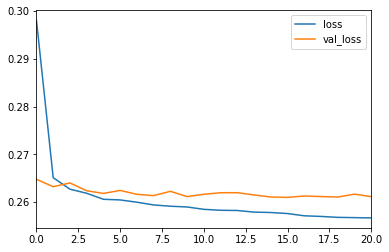

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()
#val loss hardly decreased

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
#now even though acc = 89%, theres more fully paid than charged off, so even by guessing fully paid only, you'd have high acc.
#model, for all we know, is mostly just guessing fully paid cuz thats most likely answer

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [ ]:
317696/len(df) #amount of loans fully paid / total stuff

#so even if it guessed only fully paid, acc would be 80%
#that means our model kinda sucks

0.8038479931379817

In [ ]:
#now, we've done a lotta stuff bout testing model's accuracy
#..but we've never tested it for a single person, in a simulated application/deployment setting

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind] #we have a customer whose values for each variable(excluding loan repaid) is just a random row from df
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [ ]:
model.predict_classes(new_customer) 
#X_test basically includes many customers(rows), while new_cust has one customer(row), and as such one prediction. Cant make confusion matric from one output

array([[1]], dtype=int32)

In [ ]:
df.iloc[random_ind]['loan_repaid'] #WAS REPAID, OUR MODEL DID IT

1.0

In [ ]:
#What did we learn? Well, we now know that data garbage way more work than model stuff